In [439]:
import pandas as pd
df_seq = pd.read_csv("nutm1-fusion-sequences.csv");
row = df_seq[
    (df_seq.upstream_gene == "BRD4") & 
    (df_seq.downstream_first_exon == 2)
].iloc[0]

fusion_junction_sequence = row.protein_upstream[-15:] + row.protein_downstream[:15]
fusion_junction_sequence

'PKSKKKGHPGREQKKVTLGPGPDCLILEAS'

In [494]:
import pandas as pd
df_seq = pd.read_csv("nutm1-fusion-sequences.csv");
row = df_seq[
    (df_seq.upstream_last_exon == 13) & 
    (df_seq.upstream_gene == "BRD4") & 
    
    (df_seq.downstream_first_exon == 3)
].iloc[0]

fusion_junction_sequence = row.protein_upstream[-15:] + row.protein_junction + row.protein_downstream[:15]
fusion_junction_sequence

'STPPHLNQHAVVSPPASALPGPDMSMKPSAA'

In [440]:
seq_from_exon2 = """VTLGPGPDCLILEASRQPQLVPKPERMASDGASALPGPDMSMKPSAAPSPSPALPFLPPTSDPPDHPPREPPPQPIMPSVFSPDNPLMLSAFPSSLLVTGDGGPCLSGAGAGKVIVKVKTEGGSAEPSQTQNFILTQTALNSTAPGTPCGGLEGPAPPFVTASNVKTILPSKAVGVSQEGPPGLPPQPPPPVAQLVPIVPLEKAWPGPHGTTGEGGPVATLSKPSLGDRSKISKDVYENFRQWQRYKALARRHLSQSPDTEALSCFLIPVLRSLARLKPTMTLEEGLPLAVQEWEHTSNFDRMIFYEMAERFMEFEAEEMQIQNTQLMNGSQGLSPATPLKLDPLGPLASEVCQQPVYIPKKAASKTRAPRRRQRKAQRPPAPEAPKEIPPEAVKEYVDIMEWLVGTHLATGESDGKQEEEGQQQEEEGMYPDPGLLSYINELCSQKVFVSKVEAVIHPQFLADLLSPEKQRDPLALIEELEQEEGLTLAQLVQKRLMALEEEEDAEAPPSFSGAQLDSSPSGSVEDEDGDGRLRPSPGLQGAGGAACLGKVSSSGKRAREVHGGQEQALDSPRGMHRDGNTLPSPSSWDLQPELAAPQGTPGPLGVERRGSGKVINQVSLHQDGHLGGAGPPGHCLVADRTSEALPLCWQGGFQPESTPSLDAGLAELAPLQGQGLEKQVLGLQKGQQTGGRGVLPQGKEPLAVPWEGSSGAMWGDDRGTPMAQSYDQNPSPRAAGERDDVCLSPGVWLSSEMDAVGLELPVQIEEVIESFQVEKCVTEYQEGCQGLGSRGNISLGPGETLVPGDTESSVIPCGGTVAAAALEKRNYCSLPGPLRANSPPLRSKENQEQSCETVGHPSDLWAEGCFPLLESGDSTLGSSKETLPPTCQGNLLIMGTEDASSLPEASQEAGSRGNSFSPLLETIEPVNILDVKDDCGLQLRVSEDTCPLNVHSYDPQGEGRVDPDLSKPKNLAPLQESQESYTTGTPKATSSHQGLGSTLPRRGTRNAIVPRETSVSKTHRSADRAKGKEKKKKEAEEEDEELSNFAYLLASKLSLSPREHPLSPHHASGGQGSQRASHLLPAGAKGPSKLPYPVAKSGKRALAGGPAPTEKTPHSGAQLGVPREKPLALGVVRPSQPRKRRCDSFVTGRRKKRRRSQ"""

In [441]:
df = pd.read_csv("predictions.csv")
df["hla_gene"] = df["best_allele"].map(lambda s: s.split("*")[0])

In [442]:
df_allele_freq= pd.read_csv("common-hla-alleles.csv")
allele_freq_dict = dict(zip(df_allele_freq.Haplotype, df_allele_freq.Frequency))
print(df_allele_freq)
df["allele_freq"] = df.best_allele.map(lambda a: allele_freq_dict[a])

      Haplotype  Frequency  EUR_freq  AFA_freq  API_freq  HIS_freq
0   HLA-A*11:01   5.556560     5.642     1.581    17.899     4.618
1   HLA-A*02:01  23.677880    29.604    12.458     9.458    19.403
2   HLA-A*01:01  12.549220    17.181     4.742     5.082     6.702
3   HLA-A*03:01  11.360670    14.347     8.132     2.597     7.907
4   HLA-A*24:02   8.909620     8.686     2.205    18.238    12.324
5   HLA-B*07:02  10.585200    13.987     7.303     2.632     5.453
6   HLA-B*08:01   8.994209    12.525     3.838     1.641     4.452
7   HLA-B*44:02   6.381633     9.011     2.116     0.764     3.327
8   HLA-B*44:03   5.088792     4.963     5.373     4.244     6.078
9   HLA-B*35:01   5.744100     5.713     6.494     4.273     6.353
10  HLA-C*03:04   7.462526     8.215     5.330     8.352     6.978
11  HLA-C*04:01  12.349008    10.534    18.457     8.070    16.508
12  HLA-C*05:01   6.893611     9.136     3.526     0.847     4.652
13  HLA-C*06:02   8.277646     9.301     8.855     6.518     5

In [443]:
df

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile,hla_gene,allele_freq
0,sequence_0,265,FLIPVLRSL,EALSC,ARLKP,genotype_01,14.878352,HLA-A*02:01,0.041625,0.919071,0.993569,0.000489,HLA-A,23.677880
1,sequence_0,1121,VPREKPLAL,GAQLG,GVVRP,genotype_05,29.134906,HLA-B*07:02,0.000625,0.944343,0.988814,0.001685,HLA-B,10.585200
2,sequence_0,430,YPDPGLLSY,EEEGM,INELC,genotype_09,22.875828,HLA-B*35:01,0.003250,0.859776,0.987821,0.002065,HLA-B,5.744100
3,sequence_0,1121,VPREKPLAL,GAQLG,GVVRP,genotype_06,37.009156,HLA-B*08:01,0.003250,0.944343,0.985921,0.003125,HLA-B,8.994209
4,sequence_0,265,FLIPVLRSL,EALSC,ARLKP,genotype_10,35.967311,HLA-C*03:04,0.042625,0.919071,0.984941,0.003723,HLA-C,7.462526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73563,sequence_0,556,KRAREVHG,VSSSG,GQEQA,genotype_02,34940.466237,HLA-A*01:01,92.170875,0.001230,0.002455,100.000000,HLA-A,12.549220
73564,sequence_0,572,PRGMHRDG,QALDS,NTLPS,genotype_02,34838.434318,HLA-A*01:01,92.170875,0.000316,0.002453,100.000000,HLA-A,12.549220
73565,sequence_0,1149,RRKKRRRS,SFVTG,Q,genotype_02,34914.211149,HLA-A*01:01,92.170875,0.000301,0.002448,100.000000,HLA-A,12.549220
73566,sequence_0,369,PRRRQRKA,SKTRA,QRPPA,genotype_02,34955.617967,HLA-A*01:01,92.170875,0.000375,0.002446,100.000000,HLA-A,12.549220


In [444]:
df_top = df[
    (df.affinity < 250) & 
    (df.affinity_percentile < 0.5) & 
    (df.presentation_percentile < 0.5) & 
    (df.processing_score >= 0.25)
]

In [445]:
len(df_top)

195

<AxesSubplot:ylabel='Frequency'>

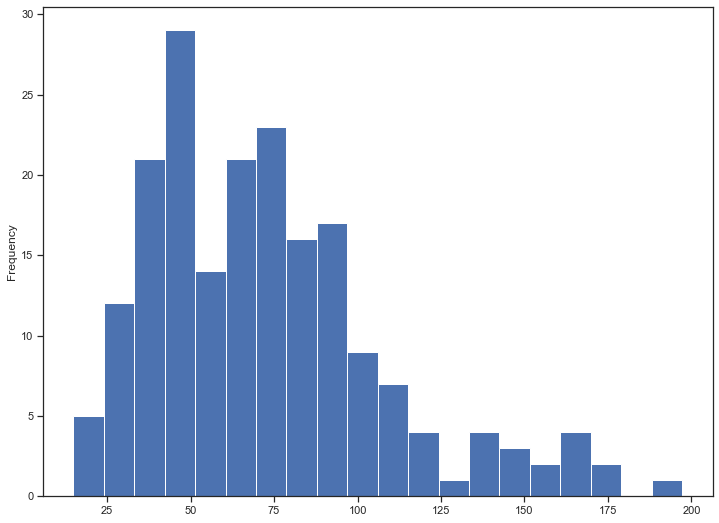

In [446]:
df_top.affinity.plot(kind="hist", bins=20)

In [447]:
alleles = sorted(set(df_top.best_allele))
genes = sorted(set(df_top.hla_gene))
print(len(genes), len(alleles))

3 16


In [448]:
df_top.best_allele.value_counts()

HLA-B*44:03    20
HLA-B*44:02    19
HLA-C*03:04    17
HLA-A*11:01    15
HLA-C*04:01    15
HLA-C*07:02    14
HLA-C*05:01    14
HLA-B*07:02    13
HLA-B*35:01    12
HLA-C*06:02    12
HLA-A*03:01    12
HLA-C*07:01     8
HLA-A*24:02     7
HLA-A*02:01     6
HLA-B*08:01     6
HLA-A*01:01     5
Name: best_allele, dtype: int64

In [449]:
import seaborn as sns

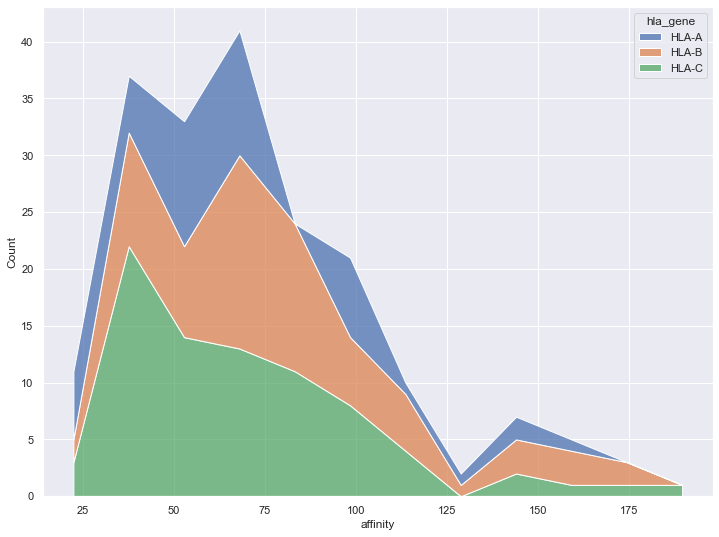

In [450]:
sns.set(rc={'figure.figsize':(12,9)})

p = sns.histplot(
    data=df_top, x="affinity", 
    hue="hla_gene", bins=12, 
    stat="count", 
    multiple="stack", 
    element="poly", 
    hue_order=genes)
fig = p.get_figure()
fig.savefig('top-predictions-by-gene.png')  

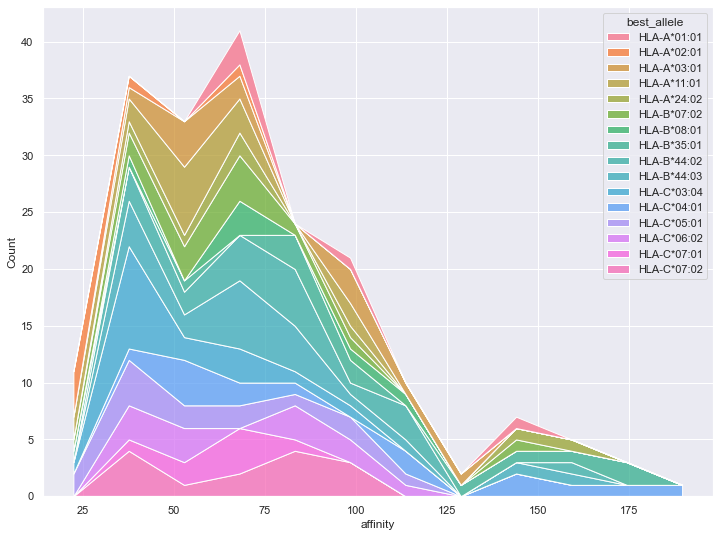

In [451]:
sns.set(rc={'figure.figsize':(12,9)})

p = sns.histplot(
    data=df_top, x="affinity", 
    hue="best_allele", bins=12, 
    stat="count", 
    multiple="stack", 
    element="poly", 
    hue_order=alleles)
fig = p.get_figure()
fig.savefig('top-predictions-by-allele.png')  

In [452]:

unique_positions = list(reversed(sorted(df_top.pos.unique())))
print(len(unique_positions))
print(unique_positions)

89
[1131, 1130, 1121, 1117, 1112, 1047, 1046, 1045, 1040, 1039, 1008, 991, 979, 972, 960, 944, 931, 921, 851, 816, 815, 811, 809, 778, 773, 772, 760, 752, 751, 704, 669, 668, 666, 660, 653, 642, 637, 629, 628, 568, 559, 534, 531, 507, 486, 452, 443, 430, 429, 428, 400, 395, 394, 384, 376, 352, 334, 317, 312, 306, 304, 303, 297, 296, 295, 291, 283, 274, 273, 265, 254, 240, 222, 212, 194, 193, 167, 163, 153, 131, 108, 91, 89, 81, 80, 79, 78, 45, 31]


In [453]:
import numpy as np 

def compute_coverage(alleles):
    fs = np.array(sorted({allele_freq_dict[a] for a in set(alleles)}))
    ps = 2*fs / 100.0
    return 100 * (1.0 - np.prod(1.0 - ps))

In [454]:
np.prod([1,2,3])

6

In [455]:
peptide_length = 15

start_positions = []
end_positions = []
long_peptides = [] 
covered_short_peptides = []
covered_unique_short_peptides = []
covered_alleles = []
cumulative_alleles = []
extra_alleles = []
extra_coverages = []
total_population_coverages = []

 
while len(long_peptides) < len(unique_positions):
    print("=== Iteration #%d" % (len(long_peptides) + 1))
    best_start = None
    best_end = None
    best_short_peptides = []
    best_unique_short_peptides = set()
    best_covered_alleles = []
    best_extra_alleles = []
    best_total_coverage = 0
    best_extra_coverage = 0
    best_cumulative_alleles = []
    best_long_peptide = None
    
    
    for start_pos in reversed(sorted(unique_positions)):
        if start_pos in start_positions:
            continue
        end_pos = start_pos + peptide_length - 1
        df_sub = df_top[(start_pos <= df_top.pos) & (df_top.pos + df_top.peptide.str.len() <= end_pos)]
        long_peptide = seq_from_exon2[start_pos:end_pos + 1]
        curr_peptides = list(df_sub.peptide)
        curr_covered_alleles = set(df_sub.best_allele)
        if len(cumulative_alleles) > 0:
            curr_all_alleles = cumulative_alleles[-1].union(curr_covered_alleles)
            curr_extra_alleles = {a for a in curr_covered_alleles if a not in cumulative_alleles[-1]}
        else:
            curr_all_alleles = curr_covered_alleles
            curr_extra_alleles = curr_covered_alleles
        assert len(curr_all_alleles) >= len(curr_extra_alleles)
        curr_extra_coverage = compute_coverage(curr_extra_alleles)
        curr_total_coverage = compute_coverage(curr_all_alleles)
        assert curr_total_coverage >= curr_extra_coverage
        print("-->", start_pos, curr_total_coverage, curr_extra_coverage, curr_extra_alleles)
        unique_short_peptides = set(curr_peptides)
        if (curr_extra_coverage > best_extra_coverage) or (
                (curr_extra_coverage == best_extra_coverage) and 
                (len(curr_covered_alleles) > len(best_covered_alleles)) or (
                    (curr_extra_coverage == best_extra_coverage) and 
                    (len(curr_covered_alleles) == len(best_covered_alleles)) and 
                    (len(unique_short_peptides) > len(best_unique_short_peptides)))):
            print("!!! NEW BEST")
            best_extra_coverage = curr_extra_coverage
            best_start = start_pos
            best_end = end_pos
            best_short_peptides = curr_peptides
            best_unique_short_peptides = unique_short_peptides
            best_covered_alleles = curr_covered_alleles
            best_cumulative_alleles = curr_all_alleles
            best_extra_alleles = curr_extra_alleles
            best_extra_coverage = curr_extra_coverage
            best_total_coverage = curr_total_coverage
            best_long_peptide = long_peptide
        
    if best_extra_coverage == 0:
        break
    else:
        start_positions.append(best_start)
        end_positions.append(best_end)
        long_peptides.append(best_long_peptide)
        covered_short_peptides.append(best_short_peptides)
        covered_unique_short_peptides.append(best_unique_short_peptides)
        covered_alleles.append(best_covered_alleles)
        extra_alleles.append(best_extra_alleles)
        extra_coverages.append(best_extra_coverage)
        total_population_coverages.append(best_total_coverage)
        cumulative_alleles.append(best_cumulative_alleles)

=== Iteration #1
--> 1131 31.309410220192003 31.309410220192003 {'HLA-A*03:01', 'HLA-A*11:01'}
!!! NEW BEST
--> 1130 31.309410220192003 31.309410220192003 {'HLA-A*03:01', 'HLA-A*11:01'}
!!! NEW BEST
--> 1121 42.77765056137805 42.77765056137805 {'HLA-B*08:01', 'HLA-B*07:02', 'HLA-B*35:01'}
!!! NEW BEST
--> 1117 55.779335133315435 55.779335133315435 {'HLA-A*03:01', 'HLA-B*08:01', 'HLA-B*07:02', 'HLA-B*35:01'}
!!! NEW BEST
--> 1112 39.08154143664 39.08154143664 {'HLA-B*07:02', 'HLA-A*03:01'}
--> 1047 56.82562594412319 56.82562594412319 {'HLA-B*08:01', 'HLA-A*02:01'}
!!! NEW BEST
--> 1046 64.51897127563761 64.51897127563761 {'HLA-B*08:01', 'HLA-A*02:01', 'HLA-A*24:02'}
!!! NEW BEST
--> 1045 77.70549329455676 77.70549329455676 {'HLA-A*24:02', 'HLA-B*08:01', 'HLA-A*02:01', 'HLA-C*03:04', 'HLA-C*06:02', 'HLA-B*35:01'}
!!! NEW BEST
--> 1040 50.76365630619799 50.76365630619799 {'HLA-B*44:02', 'HLA-B*44:03', 'HLA-C*03:04', 'HLA-C*06:02', 'HLA-B*35:01'}
--> 1039 21.64185788170655 21.6418578817065

--> 303 97.22802559050541 17.819240000000004 {'HLA-A*24:02'}
--> 297 96.62697885795339 0.0 set()
--> 296 96.62697885795339 0.0 set()
--> 295 96.62697885795339 0.0 set()
--> 291 96.62697885795339 0.0 set()
--> 283 96.62697885795339 0.0 set()
--> 274 96.62697885795339 0.0 set()
--> 273 96.62697885795339 0.0 set()
--> 265 96.62697885795339 0.0 set()
--> 254 96.62697885795339 0.0 set()
--> 240 96.62697885795339 0.0 set()
--> 222 96.62697885795339 0.0 set()
--> 212 96.62697885795339 0.0 set()
--> 194 97.00182674509439 11.113119999999999 {'HLA-A*11:01'}
--> 193 97.00182674509439 11.113119999999999 {'HLA-A*11:01'}
--> 167 96.62697885795339 0.0 set()
--> 163 97.00182674509439 11.113119999999999 {'HLA-A*11:01'}
--> 153 96.62697885795339 0.0 set()
--> 131 96.62697885795339 0.0 set()
--> 108 97.00182674509439 11.113119999999999 {'HLA-A*11:01'}
--> 91 96.62697885795339 0.0 set()
--> 89 96.62697885795339 0.0 set()
--> 81 96.62697885795339 0.0 set()
--> 80 96.62697885795339 0.0 set()
--> 79 97.22802

In [456]:
[len(c) for c in cumulative_alleles]

[7, 11, 14, 15, 16]

In [457]:
total_population_coverages

[87.00372770246332,
 94.25296198214454,
 96.62697885795339,
 97.22802559050541,
 97.53607843300183]

In [458]:
start_positions

[653, 1117, 772, 428, 811]

In [459]:
df.pos.min()

0

In [460]:
{1,2,3}.difference({2})

{1, 3}

In [461]:
compute_coverage(alleles)

97.53607843300183

In [462]:
df_peptides = pd.DataFrame({
    "start": 2 + np.array(start_positions),
    "seq": long_peptides,
    "peptides": covered_short_peptides,
    "unique_peptides": map(set, covered_short_peptides),
    "num_peptides": map(len, covered_short_peptides),
    "num_unique_peptides": map(lambda ps: len(set(ps)), covered_short_peptides),
    "alleles": covered_alleles,
    
    "num_alleles": map(len, covered_alleles),
    "cumulative_alleles": cumulative_alleles,
    "num_cumulative_alleles": map(len, cumulative_alleles),
    "population_coverage": total_population_coverages,
    "name": map(lambda start: "NUTM1 %d-%d" % (start + 2, start + peptide_length + 1), start_positions),
    
});
df_peptides["name_with_seq"] = df_peptides.name + "\n" + df_peptides.seq
df_peptides

,start,seq,peptides,unique_peptides,num_peptides,num_unique_peptides,alleles,num_alleles,cumulative_alleles,num_cumulative_alleles,population_coverage,name,name_with_seq
0,655,FQPESTPSLDAGLAE,"[FQPESTPSL, FQPESTPSL, FQPESTPSL, FQPESTPSL, F...",{FQPESTPSL},7,1,"{HLA-C*07:02, HLA-C*04:01, HLA-A*02:01, HLA-C*...",7,"{HLA-C*07:02, HLA-C*04:01, HLA-A*02:01, HLA-C*...",7,87.003728,NUTM1 655-669,NUTM1 655-669\nFQPESTPSLDAGLAE
1,1119,AQLGVPREKPLALGV,"[VPREKPLAL, VPREKPLAL, VPREKPLAL, AQLGVPREK]","{VPREKPLAL, AQLGVPREK}",4,2,"{HLA-A*03:01, HLA-B*08:01, HLA-B*07:02, HLA-B*...",4,"{HLA-B*35:01, HLA-C*07:02, HLA-C*04:01, HLA-B*...",11,94.252962,NUTM1 1119-1133,NUTM1 1119-1133\nAQLGVPREKPLALGV
2,774,QVEKCVTEYQEGCQG,"[QVEKCVTEY, VEKCVTEY, VEKCVTEY, QVEKCVTEY]","{VEKCVTEY, QVEKCVTEY}",4,2,"{HLA-A*01:01, HLA-B*44:03, HLA-B*44:02, HLA-B*...",4,"{HLA-A*01:01, HLA-B*35:01, HLA-B*44:02, HLA-C*...",14,96.626979,NUTM1 774-788,NUTM1 774-788\nQVEKCVTEYQEGCQG
3,430,GMYPDPGLLSYINEL,"[YPDPGLLSY, MYPDPGLLSY, YPDPGLLSY, YPDPGLLSY, ...","{YPDPGLLSY, GMYPDPGLLSY, MYPDPGLLSYI, YPDPGLLS...",17,6,"{HLA-A*24:02, HLA-A*01:01, HLA-B*35:01, HLA-C*...",8,"{HLA-A*01:01, HLA-B*44:02, HLA-C*05:01, HLA-B*...",15,97.228026,NUTM1 430-444,NUTM1 430-444\nGMYPDPGLLSYINEL
4,813,IPCGGTVAAAALEKR,"[TVAAAALEK, GTVAAAALEK, TVAAAALEK, IPCGGTVAA, ...","{IPCGGTVAA, TVAAAALEK, GTVAAAALEK}",6,3,"{HLA-B*07:02, HLA-B*35:01, HLA-A*03:01, HLA-A*...",4,"{HLA-A*01:01, HLA-B*44:02, HLA-C*05:01, HLA-B*...",16,97.536078,NUTM1 813-827,NUTM1 813-827\nIPCGGTVAAAALEKR


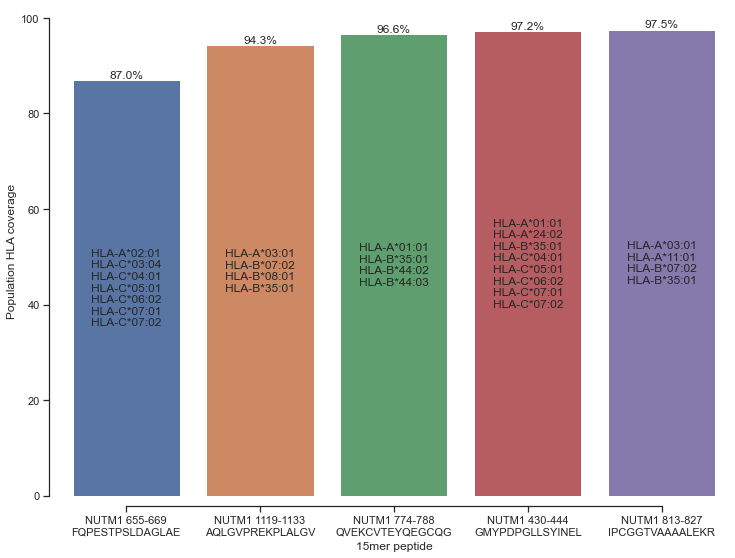

In [463]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("ticks")
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots() # initializes figure and plots

g1 = sns.barplot(
    data=df_peptides,
    x="name_with_seq",
    y="population_coverage",
    ax=ax1
)
for i in g1.containers:
    ax1.bar_label(i, labels=[
        "\n".join(sorted(curr_alleles))
        for curr_alleles in covered_alleles], label_type="center")

    ax1.bar_label(i, fmt="%0.1f%%")

# g1.bar_label(list(map(lambda f: "%0.2f%%" % f, df_peptides["population_coverage"])))
sns.despine(offset=10, trim=True)

# these lines add the annotations for the plot. 
ax1.set_xlabel('15mer peptide')
ax1.set_ylabel('Population HLA coverage')

fig.savefig('15mer-peptides-vs-population-coverage.png')


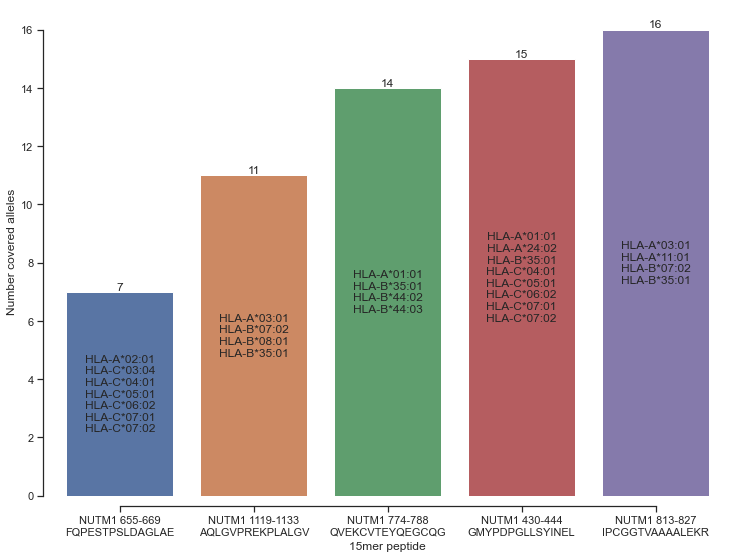

In [464]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("ticks")
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots() # initializes figure and plots

g1 = sns.barplot(
    data=df_peptides,
    x="name_with_seq",
    y="num_cumulative_alleles",
    ax=ax1
)

for idx, container in enumerate(g1.containers):
    ax1.bar_label(container, fmt="%d")
    ax1.bar_label(container, labels=[
        "\n".join(sorted(curr_alleles))
        for curr_alleles in covered_alleles], label_type="center")

sns.despine(offset=10, trim=True)

# these lines add the annotations for the plot. 
ax1.set_xlabel('15mer peptide')
ax1.set_ylabel('Number covered alleles')

fig.savefig('15mer-peptides-vs-number-alleles.png')


In [465]:
covered_alleles

[{'HLA-A*02:01',
  'HLA-C*03:04',
  'HLA-C*04:01',
  'HLA-C*05:01',
  'HLA-C*06:02',
  'HLA-C*07:01',
  'HLA-C*07:02'},
 {'HLA-A*03:01', 'HLA-B*07:02', 'HLA-B*08:01', 'HLA-B*35:01'},
 {'HLA-A*01:01', 'HLA-B*35:01', 'HLA-B*44:02', 'HLA-B*44:03'},
 {'HLA-A*01:01',
  'HLA-A*24:02',
  'HLA-B*35:01',
  'HLA-C*04:01',
  'HLA-C*05:01',
  'HLA-C*06:02',
  'HLA-C*07:01',
  'HLA-C*07:02'},
 {'HLA-A*03:01', 'HLA-A*11:01', 'HLA-B*07:02', 'HLA-B*35:01'}]

In [466]:
g1.containers

[<BarContainer object of 5 artists>]

In [467]:
sum(map(len, covered_short_peptides))

38

In [468]:
df_fusion_jxn = pd.read_csv("predictions-fusion-junction.csv")

In [469]:
df_fusion_jxn

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile
0,sequence_0,7,HPGREQKKVTL,SKKKG,GPGPD,genotype_05,66.224395,HLA-B*07:02,0.202125,0.160829,0.668866,0.491603
1,sequence_0,9,GREQKKVTL,KKGHP,GPGPD,genotype_14,59.304407,HLA-C*07:01,0.168875,0.040225,0.587086,0.640761
2,sequence_0,18,GPGPDCLIL,KKVTL,EAS,genotype_05,106.600815,HLA-B*07:02,0.364375,0.139511,0.539535,0.739891
3,sequence_0,9,GREQKKVTL,KKGHP,GPGPD,genotype_15,88.603322,HLA-C*07:02,0.436750,0.040225,0.490252,0.842201
4,sequence_0,15,VTLGPGPDCL,REQKK,ILEAS,genotype_10,147.986537,HLA-C*03:04,0.774250,0.169244,0.488033,0.846821
...,...,...,...,...,...,...,...,...,...,...,...,...
1371,sequence_0,6,GHPGREQKKVT,KSKKK,LGPGP,genotype_00,34189.026324,HLA-A*11:01,81.791000,0.001311,0.002508,100.000000
1372,sequence_0,6,GHPGREQKKVT,KSKKK,LGPGP,genotype_02,34277.211289,HLA-A*01:01,86.767500,0.001311,0.002501,100.000000
1373,sequence_0,9,GREQKKVT,KKGHP,LGPGP,genotype_03,34168.587193,HLA-A*03:01,81.663125,0.000389,0.002500,100.000000
1374,sequence_0,9,GREQKKVT,KKGHP,LGPGP,genotype_02,34534.564525,HLA-A*01:01,86.767500,0.000389,0.002475,100.000000


In [478]:
df_top_fusion = df_fusion_jxn[
    (df_fusion_jxn.affinity < 250) & 
    (df_fusion_jxn.affinity_percentile < 0.5) & 
    (df_fusion_jxn.presentation_percentile < 0.5) & 
    (df_fusion_jxn.processing_score >= 0.25) & 
    ~df_fusion_jxn.n_flank.isnull() &
    (df_fusion_jxn.n_flank.str.len() == 5) & 
    ~df_fusion_jxn.c_flank.isnull() &
    (df_fusion_jxn.c_flank.str.len() == 5) 
]

In [479]:
df_top_fusion

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile


In [481]:
df_top_fusion_weak = df_fusion_jxn[
    (df_fusion_jxn.affinity < 250) & 
    (df_fusion_jxn.affinity_percentile < 1) & 
    (df_fusion_jxn.presentation_percentile < 1) & 
    (df_fusion_jxn.processing_score >= 0.1) & 
    ~df_fusion_jxn.n_flank.isnull() &
    (df_fusion_jxn.n_flank.str.len() == 5) & 
    ~df_fusion_jxn.c_flank.isnull() &
    (df_fusion_jxn.c_flank.str.len() == 5) 
]

In [482]:
df_top_fusion_weak

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile
0,sequence_0,7,HPGREQKKVTL,SKKKG,GPGPD,genotype_05,66.224395,HLA-B*07:02,0.202125,0.160829,0.668866,0.491603
4,sequence_0,15,VTLGPGPDCL,REQKK,ILEAS,genotype_10,147.986537,HLA-C*03:04,0.774250,0.169244,0.488033,0.846821


In [483]:
compute_coverage(["HLA-B*07:02", "HLA-C*03:04"])

32.935758791392

In [484]:
df_top_fusion.peptide.str.startswith("VV")

Series([], Name: peptide, dtype: bool)

In [485]:
df_seq

,Unnamed: 0,upstream_gene,upstream_transcript,upstream_last_exon,downstream_gene,downstream_transcript,downstream_first_exon,upstream_cds,downstream_cds,junction_inside_codon,protein_upstream,protein_junction,protein_downstream,junction_same_in_both,junction_same_in_either,junction_mutant_residue
0,0,MGA,MGA-207,22,NUTM1,NUTM1-203,3,ATGGAGGAGAAACAGCAGATTATATTGGCTAATCAAGATGGTGGAA...,CATCTGCATTGCCGGGACCGGATATGAGCATGAAACCTAGTGCCGC...,True,MEEKQQIILANQDGGTVAGAAPTFFVILKQPGNGKTDQGILVTNQD...,A,SALPGPDMSMKPSAAPSPSPALPFLPPTSDPPDHPPREPPPQPIMP...,False,True,False
1,1,MGA,MGA-207,22,NUTM1,NUTM1-203,6,ATGGAGGAGAAACAGCAGATTATATTGGCTAATCAAGATGGTGGAA...,TGTACATTCCGAAGAAGGCAGCCTCCAAGACACGGGCCCCCCGCCG...,True,MEEKQQIILANQDGGTVAGAAPTFFVILKQPGNGKTDQGILVTNQD...,V,YIPKKAASKTRAPRRRQRKAQRPPAPEAPKEIPPEAVKEYVDIMEW...,False,True,False
2,2,BRD4,BRD4-213,10,NUTM1,NUTM1-203,3,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,CATCTGCATTGCCGGGACCGGATATGAGCATGAAACCTAGTGCCGC...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,A,SALPGPDMSMKPSAAPSPSPALPFLPPTSDPPDHPPREPPPQPIMP...,True,True,False
3,3,BRD4,BRD4-213,10,NUTM1,NUTM1-203,6,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,TGTACATTCCGAAGAAGGCAGCCTCCAAGACACGGGCCCCCCGCCG...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,V,YIPKKAASKTRAPRRRQRKAQRPPAPEAPKEIPPEAVKEYVDIMEW...,False,True,False
4,4,BRD4,BRD4-213,11,NUTM1,NUTM1-203,3,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,CATCTGCATTGCCGGGACCGGATATGAGCATGAAACCTAGTGCCGC...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,A,SALPGPDMSMKPSAAPSPSPALPFLPPTSDPPDHPPREPPPQPIMP...,False,True,False
5,5,BRD4,BRD4-213,11,NUTM1,NUTM1-203,6,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,TGTACATTCCGAAGAAGGCAGCCTCCAAGACACGGGCCCCCCGCCG...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,V,YIPKKAASKTRAPRRRQRKAQRPPAPEAPKEIPPEAVKEYVDIMEW...,False,True,False
6,6,BRD4,BRD4-213,12,NUTM1,NUTM1-203,2,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,GTTACTCTGGGTCCTGGACCTGACTGCCTCATTCTGGAGGCTTCCA...,False,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,NaN,VTLGPGPDCLILEASRQPQLVPKPERMASDGASALPGPDMSMKPSA...,True,True,False
7,7,BRD4,BRD4-213,13,NUTM1,NUTM1-203,3,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,CATCTGCATTGCCGGGACCGGATATGAGCATGAAACCTAGTGCCGC...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,A,SALPGPDMSMKPSAAPSPSPALPFLPPTSDPPDHPPREPPPQPIMP...,True,True,False
8,8,BRD4,BRD4-213,13,NUTM1,NUTM1-203,6,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,TGTACATTCCGAAGAAGGCAGCCTCCAAGACACGGGCCCCCCGCCG...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,V,YIPKKAASKTRAPRRRQRKAQRPPAPEAPKEIPPEAVKEYVDIMEW...,False,True,False
9,9,BRD4,BRD4-213,14,NUTM1,NUTM1-203,3,ATGTCTGCGGAGAGCGGCCCTGGGACGAGATTGAGAAATCTGCCAG...,CATCTGCATTGCCGGGACCGGATATGAGCATGAAACCTAGTGCCGC...,True,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,A,SALPGPDMSMKPSAAPSPSPALPFLPPTSDPPDHPPREPPPQPIMP...,False,True,False


In [495]:
df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3 = pd.read_csv("predictions-fusion-junction-BRD4-exon-13-NUTM1-exon-3.csv")

In [496]:
df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile
0,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_10,25.958999,HLA-C*03:04,0.004125,0.269735,0.883816,0.148016
1,sequence_0,9,AVVSPPASAL,HLNQH,PGPDM,genotype_10,41.739604,HLA-C*03:04,0.084875,0.247413,0.814837,0.254293
2,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_12,48.250039,HLA-C*05:01,0.168250,0.269735,0.806198,0.268397
3,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_05,60.356630,HLA-B*07:02,0.166500,0.269735,0.769857,0.325353
4,sequence_0,11,VSPPASAL,NQHAV,PGPDM,genotype_10,41.266842,HLA-C*03:04,0.080625,0.137863,0.745791,0.363913
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,sequence_0,3,PHLNQHAVVS,STP,PPASA,genotype_03,33824.478508,HLA-A*03:01,71.819750,0.002803,0.002548,100.000000
1436,sequence_0,3,PHLNQHAVVS,STP,PPASA,genotype_02,34046.894080,HLA-A*01:01,80.005750,0.002803,0.002532,100.000000
1437,sequence_0,5,LNQHAVVS,STPPH,PPASA,genotype_07,33811.228728,HLA-B*44:02,68.452125,0.000624,0.002528,100.000000
1438,sequence_0,5,LNQHAVVS,STPPH,PPASA,genotype_03,33979.628808,HLA-A*03:01,81.663125,0.000624,0.002516,100.000000


In [497]:
df_top_fusion_weak = df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3[
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.affinity < 250) & 
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.affinity_percentile < 1) & 
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.presentation_percentile < 1) & 
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.processing_score >= 0.1) & 
    ~df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.n_flank.isnull() &
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.n_flank.str.len() == 5) & 
    ~df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.c_flank.isnull() &
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.c_flank.str.len() == 5) 
]

In [498]:
len(df_top_fusion_weak)

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile
0,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_10,25.958999,HLA-C*03:04,0.004125,0.269735,0.883816,0.148016
1,sequence_0,9,AVVSPPASAL,HLNQH,PGPDM,genotype_10,41.739604,HLA-C*03:04,0.084875,0.247413,0.814837,0.254293
2,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_12,48.250039,HLA-C*05:01,0.168250,0.269735,0.806198,0.268397
3,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_05,60.356630,HLA-B*07:02,0.166500,0.269735,0.769857,0.325353
4,sequence_0,11,VSPPASAL,NQHAV,PGPDM,genotype_10,41.266842,HLA-C*03:04,0.080625,0.137863,0.745791,0.363913
5,sequence_0,8,HAVVSPPASAL,PHLNQ,PGPDM,genotype_10,41.759235,HLA-C*03:04,0.084875,0.103827,0.718153,0.407826
7,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_13,82.580252,HLA-C*06:02,0.222125,0.269735,0.711411,0.419565
8,sequence_0,17,ALPGPDMSM,SPPAS,KPSAA,genotype_10,55.346139,HLA-C*03:04,0.202500,0.142691,0.691857,0.450978
9,sequence_0,17,ALPGPDMSM,SPPAS,KPSAA,genotype_12,61.158879,HLA-C*05:01,0.252500,0.142691,0.670749,0.488315
10,sequence_0,15,ASALPGPDM,VVSPP,SMKPS,genotype_10,57.941107,HLA-C*03:04,0.221750,0.119393,0.662758,0.501929


In [499]:
df_top_fusion_strong = df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3[
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.affinity < 250) & 
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.affinity_percentile < 0.5) & 
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.presentation_percentile < 0.5) & 
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.processing_score >= 0.25) & 
    ~df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.n_flank.isnull() &
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.n_flank.str.len() == 5) & 
    ~df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.c_flank.isnull() &
    (df_fusion_jxn_BRD4_exon_13_NUTM1_exon_3.c_flank.str.len() == 5) 
]

In [501]:
len(df_top_fusion_strong)

4

In [502]:
df_top_fusion_strong

,sequence_name,pos,peptide,n_flank,c_flank,sample_name,affinity,best_allele,affinity_percentile,processing_score,presentation_score,presentation_percentile
0,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_10,25.958999,HLA-C*03:04,0.004125,0.269735,0.883816,0.148016
2,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_12,48.250039,HLA-C*05:01,0.168250,0.269735,0.806198,0.268397
3,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_05,60.356630,HLA-B*07:02,0.166500,0.269735,0.769857,0.325353
7,sequence_0,10,VVSPPASAL,LNQHA,PGPDM,genotype_13,82.580252,HLA-C*06:02,0.222125,0.269735,0.711411,0.419565
